In [1]:
import pandas as pd
df = pd.read_csv("analisis_frontal_hand_deepface.csv")

def calculate_difference(row):
    gt = row['gt']    
    if gt == 'angry':
        return row['angry_after'] - row['angry_before']
    elif gt == 'disgust':
        return row['disgust_after'] - row['disgust_before']
    elif gt == 'fear':
        return row['fear_after'] - row['fear_before']
    elif gt == 'happy':
        return row['happy_after'] - row['happy_before']
    elif gt == 'sadness':
        return row['sadness_after'] - row['sadness_before']
    elif gt == 'surprise':
        return row['surprise_after'] - row['surprise_before']
    elif gt == 'neutral':
        return row['neutral_after'] - row['neutral_before']
    else:
        return None

df['probability_difference'] = df.apply(calculate_difference, axis=1)

def calculate_status(row):
    if row['probability_difference'] > 0:
        return 'meningkat'
    elif row['probability_difference'] < 0:
        return 'turun'
    else:
        return 'tidak berubah'

df['status'] = df.apply(calculate_status, axis=1)

missing_before = df["dominant_emotion_before"].isna().sum()
missing_after = df["dominant_emotion_after"].isna().sum()
print(f"Gagal deteksi before: {missing_before}")
print(f"Gagal deteksi after: {missing_after}")

correct_before = (df["gt"] == df["dominant_emotion_before"]).sum()
correct_after = (df["gt"] == df["dominant_emotion_after"]).sum()

print("\n")
print("Correct before:", correct_before)
print("Correct after:", correct_after)

accuracy_before = (df["gt"] == df["dominant_emotion_before"]).mean() * 100
accuracy_after = (df["gt"] == df["dominant_emotion_after"]).mean() * 100

print("\n")
print(f"Akurasi before: {accuracy_before:.2f}%")
print(f"Akurasi after: {accuracy_after:.2f}%")

accuracy_per_class_before = ((df["gt"] == df["dominant_emotion_before"]).groupby(df["gt"]).mean() * 100)
accuracy_per_class_after = ((df["gt"] == df["dominant_emotion_after"]).groupby(df["gt"]).mean() * 100)

print("\n")
print("Akurasi per emosi (before):")
print(accuracy_per_class_before)

print("\n")
print("Akurasi per emosi (after):")
print(accuracy_per_class_after)

sum_peningkatan = df[df["status"] == "meningkat"].groupby("gt").size()
sum_penurunan = df[df["status"] == "turun"].groupby("gt").size()

print("\n")
print("Jumlah Peningkatan per Kelas:")
print(sum_peningkatan)
print("\nJumlah Penurunan per Kelas:")
print(sum_penurunan)



Gagal deteksi before: 0
Gagal deteksi after: 0


Correct before: 372
Correct after: 590


Akurasi before: 23.94%
Akurasi after: 37.97%


Akurasi per emosi (before):
gt
angry       36.036036
disgust      1.801802
fear        26.576577
happy       18.018018
neutral     19.819820
sad         29.279279
surprise    36.036036
dtype: float64


Akurasi per emosi (after):
gt
angry       37.387387
disgust      9.009009
fear        26.126126
happy       70.270270
neutral     63.513514
sad         37.387387
surprise    22.072072
dtype: float64


Jumlah Peningkatan per Kelas:
gt
angry       122
disgust     130
fear        100
happy       178
neutral     177
surprise     94
dtype: int64

Jumlah Penurunan per Kelas:
gt
angry        99
disgust      47
fear        122
happy        44
neutral      45
surprise    124
dtype: int64


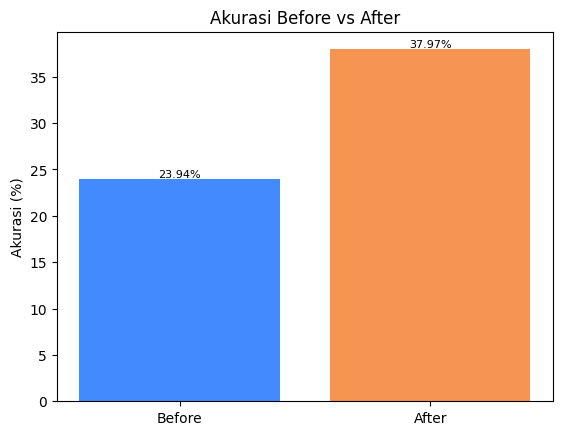

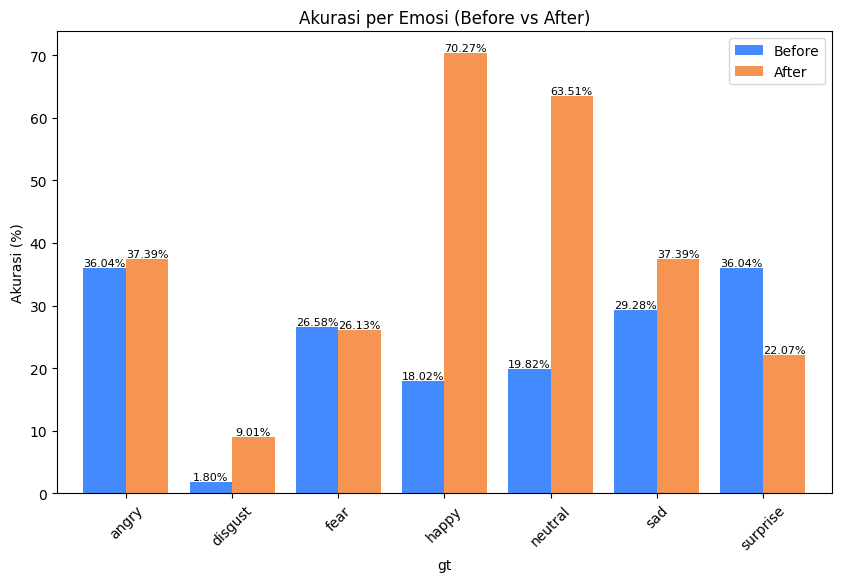

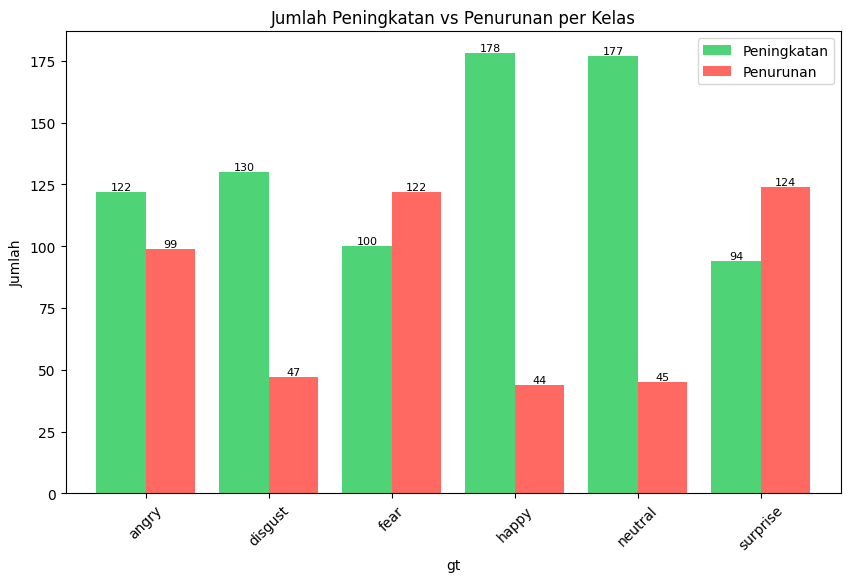

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

sz = (10, 6)
w = 0.8

fig, ax = plt.subplots()
bars = ax.bar(["Before", "After"], [accuracy_before, accuracy_after], color=["#448aff", "#f69552"], width=w)
ax.set_title("Akurasi Before vs After")
ax.set_ylabel("Akurasi (%)")

for p in bars:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )
fig.savefig("fig/deepface_hand_akurasi_all.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=sz)
df_accuracy = pd.DataFrame({
    "Before": accuracy_per_class_before,
    "After": accuracy_per_class_after
})
df_accuracy.plot(kind='bar', ax=ax, width=w, color=["#448aff", "#f69552"])  # Custom colors
ax.set_title("Akurasi per Emosi (Before vs After)")
ax.set_ylabel("Akurasi (%)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )
fig.savefig("fig/deepface_hand_akurasi_per_kelas.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=sz)
df_summary = pd.DataFrame({
    "Peningkatan": sum_peningkatan,
    "Penurunan": sum_penurunan
})
df_summary.plot(kind='bar', ax=ax, width=w, color=["#4fd377", "#ff6961"])  # Custom colors
ax.set_title("Jumlah Peningkatan vs Penurunan per Kelas")
ax.set_ylabel("Jumlah")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )
fig.savefig("fig/deepface_hand_komparasi_up_down.png", dpi=300)
plt.show()
